<a href="https://colab.research.google.com/github/EighteenSprings/Machine_Learning_Foundation/blob/main/SGD_%E5%AD%A6%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 深度学习基础——SGD
学习 [梯度下降是门手艺活](https://zhuanlan.zhihu.com/p/21486804)  

  
  


## 一、SGD
  
梯度下降算法由两个函数、三个变量组成  

两个函数  
- 待求得函数
- 待求函数的导数  

三个变量  
- 当前找到的变量  
- 梯度  
- 步长

In [111]:
def gd(x_start, step, g):
  x_ = []
  x = x_start
  for i in range(20):
    grad = g(x)
    x -= grad * step
    x_.append(x)
    # print(f"[ Epoch {i} ] grad = {grad}, x = {x}")
    if abs(grad) < 1e-6:
      break
  return x_

In [114]:
def f(x):
  return x**2 - 2*x + 1

def g(x):
  return 2*x - 2

In [112]:
import numpy as np
import matplotlib.pyplot as plt

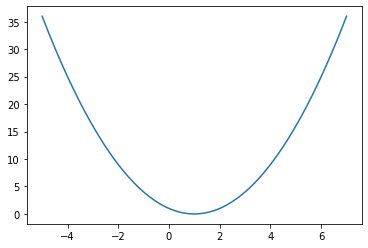

In [116]:
x = np.linspace(-5, 7, 100)
y = f(x)
plt.plot(x, y)


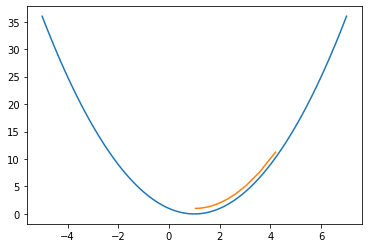

In [119]:
x_arr = gd(5, 0.1, g)
plt.plot(x, y)
plt.plot(x_arr, [f(x)+1 for x in x_arr])

In [8]:
gd(5, 1, g)

[ Epoch 0 ] grad = 8, x = -3
[ Epoch 1 ] grad = -8, x = 5
[ Epoch 2 ] grad = 8, x = -3
[ Epoch 3 ] grad = -8, x = 5
[ Epoch 4 ] grad = 8, x = -3
[ Epoch 5 ] grad = -8, x = 5
[ Epoch 6 ] grad = 8, x = -3
[ Epoch 7 ] grad = -8, x = 5
[ Epoch 8 ] grad = 8, x = -3
[ Epoch 9 ] grad = -8, x = 5
[ Epoch 10 ] grad = 8, x = -3
[ Epoch 11 ] grad = -8, x = 5
[ Epoch 12 ] grad = 8, x = -3
[ Epoch 13 ] grad = -8, x = 5
[ Epoch 14 ] grad = 8, x = -3
[ Epoch 15 ] grad = -8, x = 5
[ Epoch 16 ] grad = 8, x = -3
[ Epoch 17 ] grad = -8, x = 5
[ Epoch 18 ] grad = 8, x = -3
[ Epoch 19 ] grad = -8, x = 5


5

## 二、动量

In [65]:
def momentum(x_start, step, g, discount = 0.7):
  x_ = []
  y_ = []
  x = np.array(x_start, dtype='float64')
  pred_grad = np.zeros_like(x)
  for i in range(250):
    grad = g(x)
    pred_grad = pred_grad * discount + grad*step
    x -= pred_grad
    x_.append(x[0])
    y_.append(x[1])
    # print(f"[ Epoch {i} ] grad = {grad}, x = {x}")
    if abs(sum(grad)) < 1e-6:
      break
  return np.array(x_, dtype='float64'), np.array(y_, dtype='float64')

In [80]:
def f(x):
  return x[0] * x[0] + 50 * x[1] * x[1]

def g(x):
  return np.array([2 * x[0], 100 * x[1]])

xi = np.linspace(-200, 200, 1000)
yi = np.linspace(-100., 100, 1000)
X,Y = np.meshgrid(xi, yi)
Z = X*X + 50 * Y * Y


In [27]:
xi.shape, yi.shape, X.shape, Y.shape

((1000,), (1000,), (1000, 1000), (1000, 1000))

In [108]:
def gd(x_start, step, g):
  x_ = []
  y_ = []
  x = np.array(x_start, dtype='float64')
  for i in range(50):
    grad = g(x)
    x -= grad * step
    x_.append(x[0])
    y_.append(x[1])
    #print(f"[ Epoch {i} ] grad = {grad}, x = {x}")
    if (np.abs(grad) < 1e-6).any():
      break
  return np.array(x_, dtype='float64'), np.array(y_, dtype='float64')

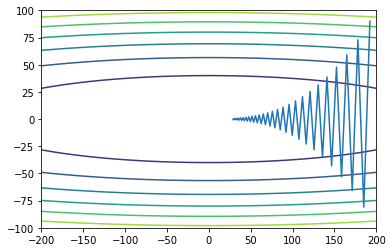

In [55]:
x_arr = gd([200, -100], 0.019, g)
plt.plot(x_arr[0], x_arr[1])
plt.contour(X, Y, Z, )

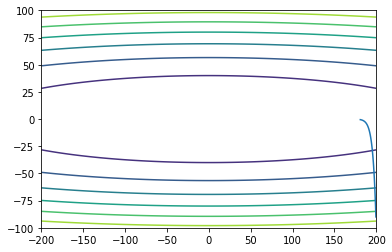

In [109]:
x_arr = gd([200, -100], 0.001, g)
plt.plot(x_arr[0], x_arr[1])
plt.contour(X, Y, Z, )

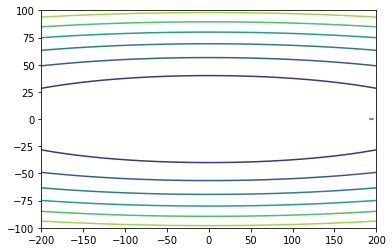

In [110]:
x_arr = gd([200, -100], 0.01, g)
plt.plot(x_arr[0], x_arr[1])
plt.contour(X, Y, Z, )

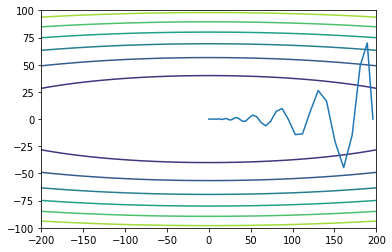

In [100]:
# momentum
x_arr = momentum([200, -100], 0.01, g)
plt.plot(x_arr[0], x_arr[1])
plt.contour(X, Y, Z,)

In [97]:
def nesterov(x_start, step, g, discount = 0.9):
  x_ = []
  y_ = []
  x = np.array(x_start, dtype='float64')
  pre_grad = np.zeros_like(x)
  for i in range(50):
    x_future = x - step * discount * pre_grad
    grad = g(x_future)
    pre_grad = pre_grad * discount + grad
    x -= pre_grad * step
    x_.append(x[0])
    y_.append(x[1])
    # print(f"[ Epoch {i} grad = {grad}, x = {x}")
    if abs(sum(grad)) < 1e-6:
      break
  return np.array(x_, dtype='float64'), np.array(y_, dtype='float64')
    


(-100.0, 100.0)

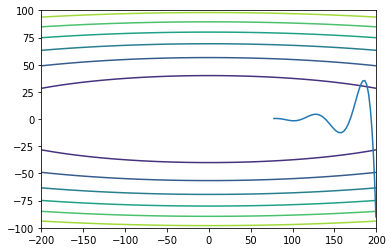

In [99]:
x_arr = nesterov([200,-100], 0.001, g)
plt.plot(x_arr[0], x_arr[1])
plt.contour(X, Y, Z,)
plt.xlim(-200, 200)
plt.ylim(-100, 100)